<a href="https://colab.research.google.com/github/AK-2406/Major-Project-/blob/main/YOLO%26OCR_videoGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 14.8 MB/s eta 0:00:00


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 13.5 MB/s eta 0:00:00


In [3]:
!pip install Pillow

In [4]:
from google.colab import files
uploaded = files.upload()

Saving best.pt to best.pt


In [5]:
from google.colab import files
uploaded = files.upload()

Saving test_video.mp4 to test_video.mp4


In [6]:
!pip install opencv-python

In [7]:
import os
import torch
import easyocr
import cv2
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors
from PIL import Image
import cv2

# Load trained YOLO model
model = YOLO('best.pt')

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# OCR Function
def getOCR(im, coors):
    x, y, w, h = int(coors[0]), int(coors[1]), int(coors[2]), int(coors[3])
    #cropped = im[y:h, x:w]
    #gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
    #results = reader.readtext(gray)
    #ocr_text = "".join([result[1] for result in results])
    #return ocr_text

    # Preprocessing:
    resized = cv2.resize(cropped, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    results = reader.readtext(thresh, detail=1, paragraph=False, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    ocr_text = "".join([result[1] for result in results])
    return ocr_text

def run_inference_video(video_path):
    # Read input video
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return None

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define codec and create VideoWriter object
    output_path = 'output/output.mp4'

    # Use platform-specific codec
    #if os.name == 'nt':  # Windows
        #fourcc = cv2.VideoWriter_fourcc(*'H264')
    #else:  # Linux/Mac
        #fourcc = cv2.VideoWriter_fourcc(*'avc1')

 # Use platform-specific codec and more robust codec options
    if os.name == 'nt':  # Windows
        fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Try XVID if H264 fails
    else:  # Linux/Mac
        fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Try XVID for better compatibility

         # Ensure directory exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Check if the codec is supported
    if not cv2.VideoWriter_fourcc(*'XVID'):
        print("XVID codec not supported. Please install the necessary codec libraries.")
        return None

    out = cv2.VideoWriter(
        output_path,
        fourcc,
        fps,
        (width, height),
        isColor=True
    )

    frame_count = 0

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert frame to RGB for YOLO
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Run YOLO inference
            results = model(frame_rgb)

            # Convert back to BGR for OpenCV
            annotated_frame = cv2.cvtColor(results[0].plot(), cv2.COLOR_RGB2BGR)

            # Write frame
            out.write(annotated_frame)

            frame_count += 1
            if frame_count % 30 == 0:  # Print progress every 30 frames
                print(f"Processed {frame_count} frames")

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    finally:
        # Ensure resources are released
        cap.release()
        out.release()
        cv2.destroyAllWindows()

        if os.path.exists(output_path) and os.path.getsize(output_path) > 0:
            print(f"Video saved successfully to {output_path}")
            return output_path
        else:
            print("Error: Output video file is empty or not created")
            return None

# Example Usage
video_path = 'test_video.mp4'
output = run_inference_video(video_path)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Streaming output truncated to the last 5000 lines.

0: 384x640 1 License_Plate, 124.9ms
Speed: 3.9ms preprocess, 124.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 124.0ms
Speed: 3.6ms preprocess, 124.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 139.5ms
Speed: 4.0ms preprocess, 139.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 152.6ms
Speed: 3.9ms preprocess, 152.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 122.9ms
Speed: 3.6ms preprocess, 122.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 122.6ms
Speed: 7.5ms preprocess, 122.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 License_Plates, 135.8ms
Speed: 4.0ms preprocess, 135.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0:

In [8]:
#!zip -r results.zip output
!zip -r results.zip . -i output

	zip warning: zip file empty


Streaming output truncated to the last 5000 lines.

0: 384x640 1 License_Plate, 205.0ms
Speed: 4.0ms preprocess, 205.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 198.8ms
Speed: 3.9ms preprocess, 198.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 238.9ms
Speed: 5.3ms preprocess, 238.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 212.5ms
Speed: 8.7ms preprocess, 212.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 206.3ms
Speed: 3.9ms preprocess, 206.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 190.7ms
Speed: 7.4ms preprocess, 190.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 License_Plates, 262.8ms
Speed: 5.0ms preprocess, 262.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0:

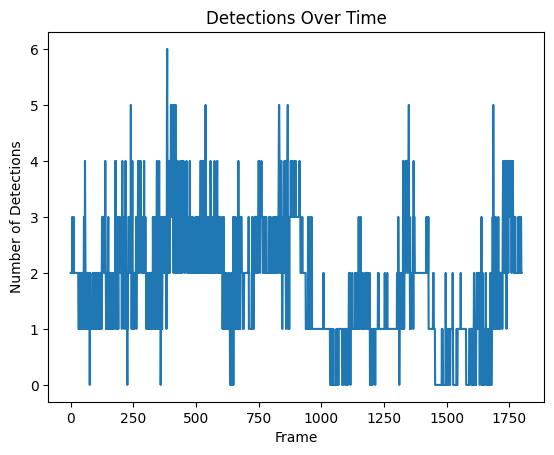

In [9]:
import os
import torch
import easyocr
import cv2
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Load trained YOLO model
model = YOLO('best.pt')

# OCR Function
def getOCR(im, coors):
    x, y, w, h = int(coors[0]), int(coors[1]), int(coors[2]), int(coors[3])


    # Preprocessing:
    resized = cv2.resize(cropped, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    results = reader.readtext(thresh, detail=1, paragraph=False, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
    ocr_text = "".join([result[1] for result in results])
    return ocr_text

def run_inference_video(video_path):
    # Read input video
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return None

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Define codec and create VideoWriter object
    output_path = 'output/output.mp4'

    # Use platform-specific codec and more robust codec options
    if os.name == 'nt':  # Windows
        fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Try XVID if H264 fails
    else:  # Linux/Mac
        fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Try XVID for better compatibility

    # Ensure directory exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Check if the codec is supported
    if not cv2.VideoWriter_fourcc(*'XVID'):
        print("XVID codec not supported. Please install the necessary codec libraries.")
        return None

    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height), isColor=True)

    frame_count = 0
    all_detections = []  # Store detections for later analysis

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert frame to RGB for YOLO
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Run YOLO inference
            results = model(frame_rgb)

            # Store detections for this frame
            detections = []
            for *xyxy, conf, cls in results[0].boxes.data:
                detections.append([cls.item(), conf.item(), *xyxy])
            all_detections.append(detections)

            # Convert back to BGR for OpenCV
            annotated_frame = cv2.cvtColor(results[0].plot(), cv2.COLOR_RGB2BGR)

            # Write frame
            out.write(annotated_frame)

            frame_count += 1
            if frame_count % 30 == 0:
                print(f"Processed {frame_count} frames")

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    finally:
        # Ensure resources are released
        cap.release()
        out.release()
        cv2.destroyAllWindows()

        if os.path.exists(output_path) and os.path.getsize(output_path) > 0:
            print(f"Video saved successfully to {output_path}")

            # Post-inference analysis (example - detections over time)
            detections_per_frame = [len(d) for d in all_detections]
            plt.plot(detections_per_frame)
            plt.xlabel("Frame")
            plt.ylabel("Number of Detections")
            plt.title("Detections Over Time")
            plt.show()  # Display the plot in Colab

            return output_path
        else:
            print("Error: Output video file is empty or not created")
            return None

# Example Usage
video_path = 'test_video.mp4'
output = run_inference_video(video_path)